Author: Jarno - azzipxonraj \
Date Created: 06-03-2025 \
Date Modified: 06-03-2025 \
Description: This jupyter notebook will use machine learning based
on supervised classification data from a heartdisease database.
Research question: Can a model predict based on symptoms if a patient has heartdisease? \
Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data \

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn3
import scipy.stats as stats


## Read the Data


Here i will look at the data to see if anything is broken or if there are any NA's present


In [3]:
df = pd.read_csv("Data/heart.csv")
display(df)
df.shape

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


(918, 12)

This data has different data types like bolean, numerical and strings. It is as the assignment asks a labeled dataset as seen by the HeartDisease columns that either displays 1 (TRUE) or 0 (FALSE) making it suitable for a  supervised classification machine learning model. On the surfrace this data looks usable, now in the following part an analysis will be made if it is actually usable.

In [4]:
df.columns.tolist()


['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

After downloading the dataset it is necesarry to check if our collums match with those shown on the Kagle website.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


df.info() shows how many columns there are, what each collums name is, what the non-null counts is (so how many entries) and the data type for each column. 

To make it easier and check what each collumn contains and what ammount. This is important to know to see if there are inbalances, it also checks the null count incase there are undefineds.



In [7]:
df.isnull().any()


Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

The data gets checked for any NA's and NaN, the df.isnull.any() shows this quickly for each column and there are no missing data values.

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Here some general statistics get shown for each column that has a numerical value, it shows how many entries (shown before too), it shows the average for each column, the lowest and highest value measuered, the 25%, 50% and 75% and the standard deviation. It is important to know this because it shows the distribution of the data, if there are any outliers and again a quality control. The heart disease mean shows that +55% of people in this dataset have heartsdisease. The minimal for cholesterol is also rather strange because this is not possible, this might call for imputation of the data to solve this. other then that some outliers should be filtered out or also call for the earlier mentioned imputation of the data. 

In [76]:
codebook = {
    "attribute": [
        "Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", 
        "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "HeartDisease"
    ],
    "unit": [
        "years", "category", "category", "mmHg", "mg/dL", "bool", 
        "category", "bpm", "bool", "ST depression", "category", "bool"
    ],
    "dtype": [
        "int64", "object", "object", "int64", "int64", "int64", 
        "object", "int64", "object", "float64", "object", "int64"
    ],
    "description": [
        "Age of the patient",
        "Sex of the patient (Male/Female)",
        "Type of chest pain experienced (e.g., typical angina, atypical angina, non-anginal, asymptomatic)",
        "Resting blood pressure in mmHg",
        "Serum cholesterol in mg/dL",
        "Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)",
        "Resting electrocardiographic results (e.g., Normal, ST-T wave abnormality, left ventricular hypertrophy)",
        "Maximum heart rate achieved during exercise",
        "Exercise-induced angina (Yes/No)",
        "ST depression induced by exercise relative to rest",
        "Slope of the peak exercise ST segment (e.g., upsloping, flat, downsloping)",
        "Presence of heart disease (1 = Disease, 0 = No disease)"
    ]
}

pd.DataFrame(codebook).set_index("attribute")

,unit,dtype,description
attribute,,,
Age,years,int64,Age of the patient
Sex,category,object,Sex of the patient (Male/Female)
ChestPainType,category,object,"Type of chest pain experienced (e.g., typical ..."
RestingBP,mmHg,int64,Resting blood pressure in mmHg
Cholesterol,mg/dL,int64,Serum cholesterol in mg/dL
FastingBS,bool,int64,"Fasting blood sugar > 120 mg/dL (1 = true, 0 =..."
RestingECG,category,object,"Resting electrocardiographic results (e.g., No..."
MaxHR,bpm,int64,Maximum heart rate achieved during exercise
ExerciseAngina,bool,object,Exercise-induced angina (Yes/No)


To explain to a user that might use the trained algoritm a codebook has been generated, This tells for each attribute what unit it is, the data type that it contains and a description of what it means. The codebook needs to explain to a user that want's to work with this data or with the trained model what every attribute means without having to look into the data specifically. Also a codebook can be used for reproducabilty, letting the next user know how the writer of the logbook interpreted the data.

## EDA (Exploratory Data Analysis)

For building an accurate, trustable and good model overal there needs to be a good insight of what the data is that is being worked with. A exploratory data analysis is to gain insight on what the data contains and or is that is being worked with. Checking if the data is evenly distributed, what factors should play a key role and what factors should have less weight when training the model. If the data isn't evenly distibuted, has errors or outliers that cause problems. The data can be manipulated with imputing or something like one hot encoding to make it more usable and trustable. To see all of this visualisations play a key role, these visualisations can shows patterns, structures in the data and anomalies/ abnormality's.



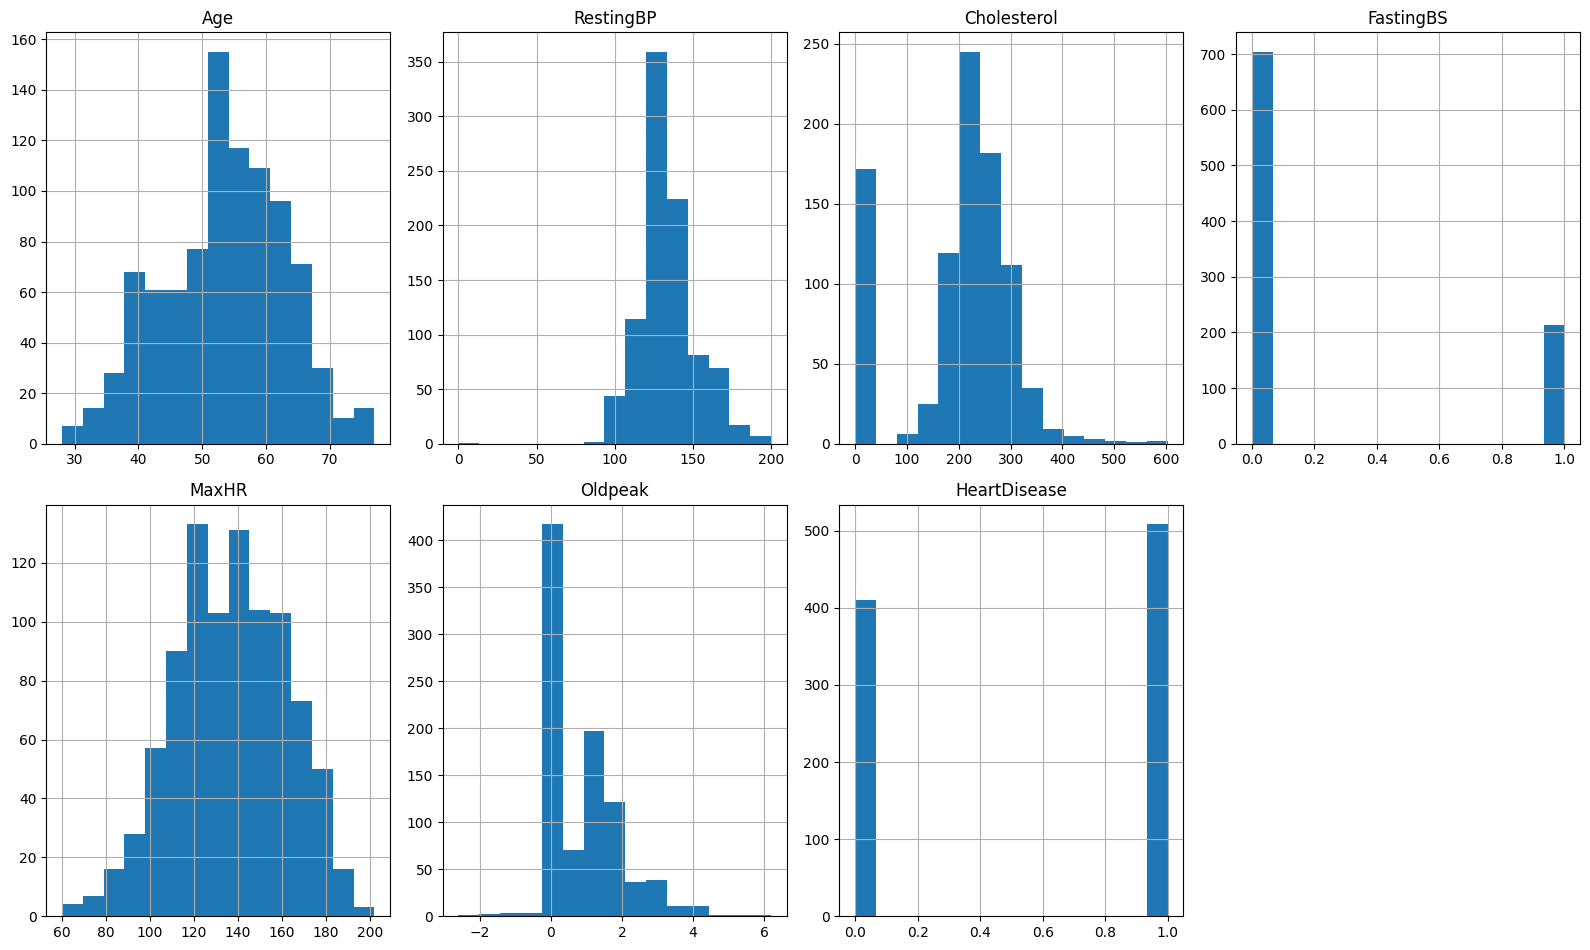

In [77]:

df.hist(bins=15, layout=(2, 4), figsize=(16.0, 9.6));plt.tight_layout()
plt.show()



Here we check all the numeric features for their distribution. If the distribution looks very one sided it might give us a problem in the training of the model. In this case the data mostly looks evenly distributed except for cholesterol that has a strange peak at the 0-50. This needs to be kept in mind for the further analysis.

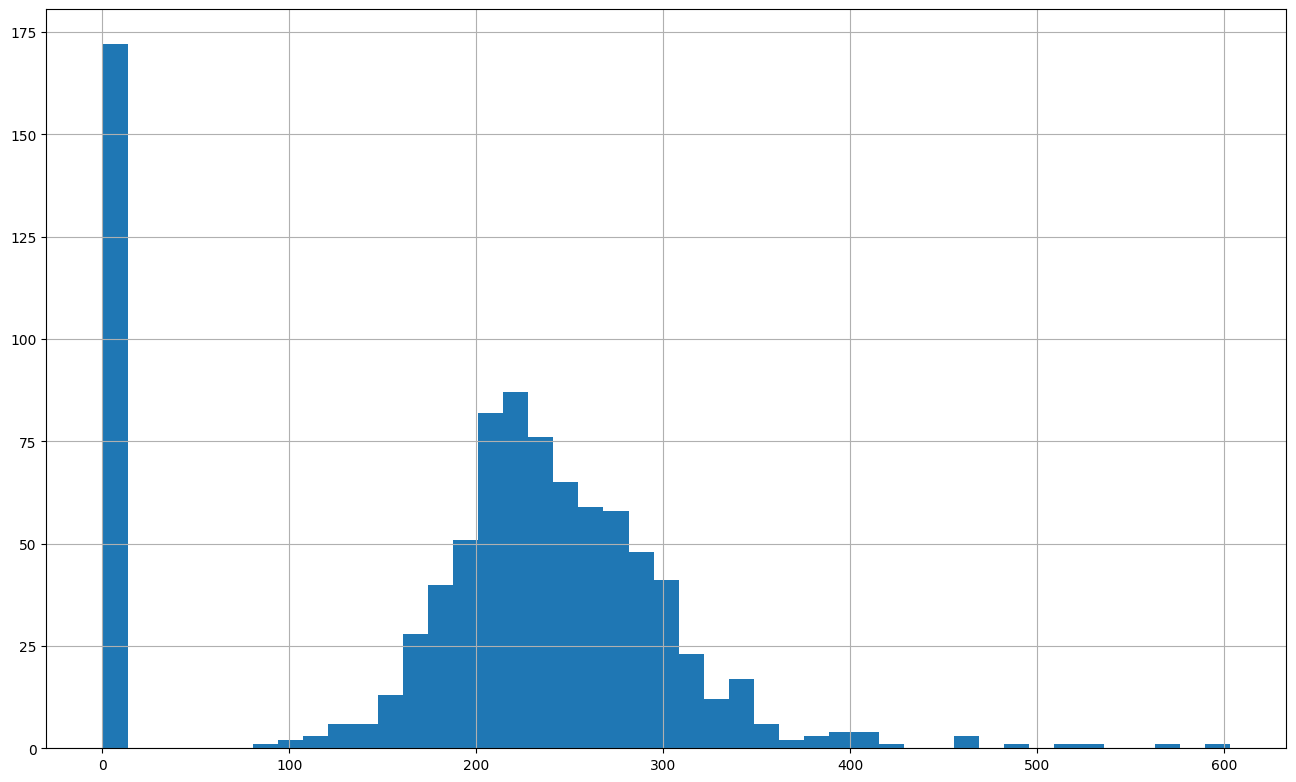

In [78]:
df["Cholesterol"].hist(bins=45, figsize=(16.0, 9.6))
plt.show()


Here is a more clear graph of the cholesterol. It looks like the peak is at 0 cholesterol and this is ofcourse not possible. This would mean the person that has this cannot make any hormones and cellular functions would be disturbed.

In [79]:
df["Cholesterol"].describe().T

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

It does look like the mean is alright. But before this is used it does need to be changed perhaps by changing this data to NA or dropping the data to fix the distribution.

In [80]:
print("Records with Cholesterol = 0:", (df["Cholesterol"] == 0).sum())



df = df[df["Cholesterol"] != 0]


Records with Cholesterol = 0: 172


I have decided it is best to drop all the records that contain 0 cholesterol, This deletes 172 entry's leaving us with 746 entry's that will be enough to get a good model with.

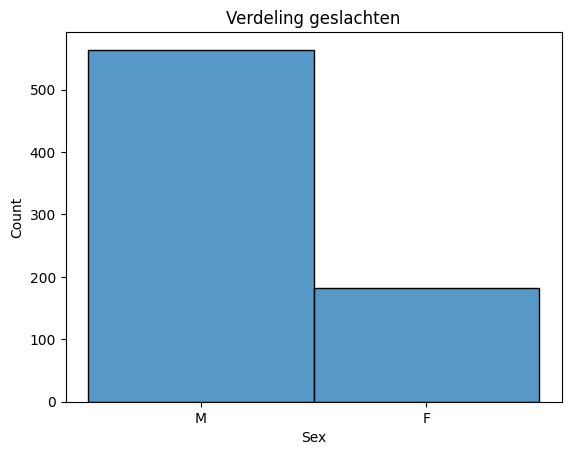

In [81]:
axs = sns.histplot(df["Sex"])
axs.set_title("Distribution of Sexes");

A significant difference is also the 3x larger ammount of male entry's in the dataframe, this could cause problems but could also make a good comperasin between sexes.

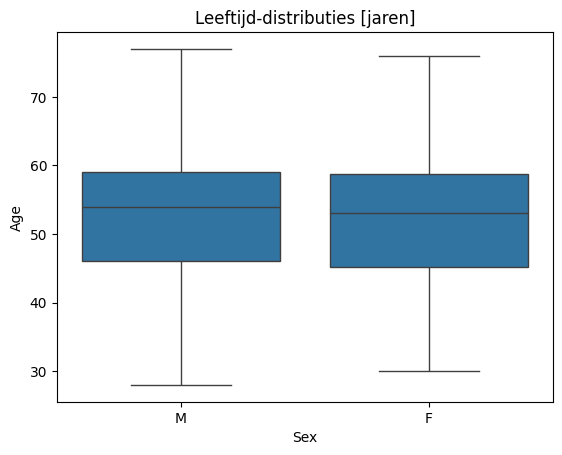

In [83]:
axs = sns.boxplot(data=df, x="Sex", y="Age")
axs.set_title("age-Distribution [years]");

Even though the distribution between the two is very different it seems the average age and mix max isn't very effected. 

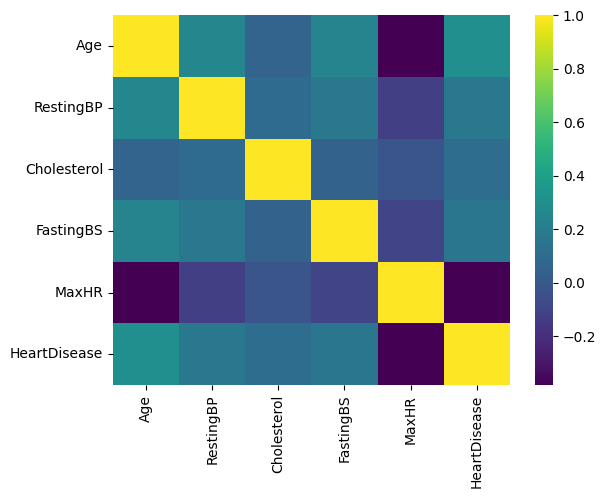

In [84]:
int_features_df = df[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "HeartDisease"]]

sns.heatmap(int_features_df.corr(), cmap="viridis")
plt.show()


This plot shows the correlation of heart disease with different factors. 
HeartDisease & Age have a slight correlation meaning that the age has a bit of an influence on if a patient has heart disease the correlation matrix puts it between 0.2 and 0.4. \

HeartDisease & Fasting blood sugar also seems to have a slight correlation with heartdisease, a little less then age but more then 0.0 so between 0.2 & 0.3. \

There really doesnt seem to be a very solid defining feature that correlates on any axis. However there are some things that have a strong negative correlation like max heart rate. This doesn't seem to have any correlation with heart disease. \

In short Age & Fasting blood sugar have most correlation, RestingBP and Cholesterol have weak correlation and Max heart rate has no correlation.

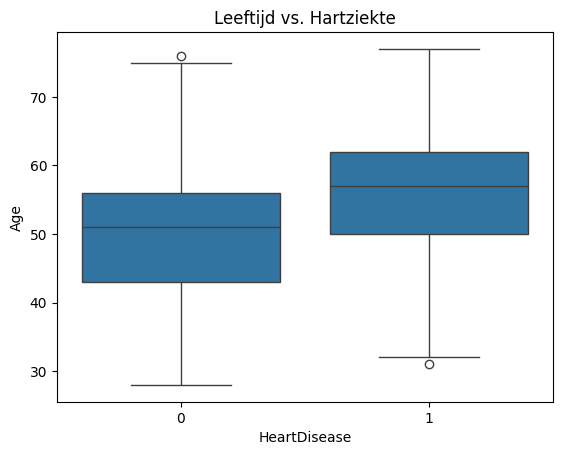

In [85]:
sns.boxplot(x=df['HeartDisease'], y=df['Age'])
plt.title("Age vs. Heartdisease")
plt.show()



THe average age for people with heart disease seems to be around 57+ but for people without seems to be closer to 51.

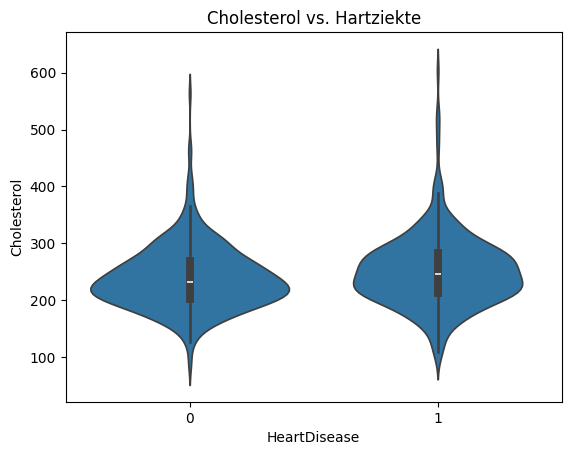

In [86]:
sns.violinplot(x=df['HeartDisease'], y=df['Cholesterol'])
plt.title("Cholesterol vs. HeartDisease")
plt.show()

It seems that people that have Heartdisease have a weird distrubution going of in terms of cholesterol. there is a big blob of people that have less then 0 or even negative cholesterol. That seems quite impossible due to not being able to live without cholesterol.

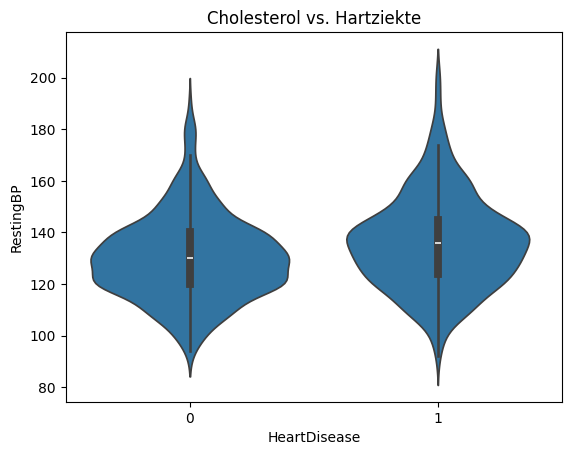

In [87]:
sns.violinplot(x=df['HeartDisease'], y=df['RestingBP'])
plt.title("Cholesterol vs. Heartdisease")
plt.show()

It seems that people that have heartdisease have slighty higher resting blood pressure but there isnt a big difference. although highblood pressure usually gets taken in as metric for early stages of cardio vascular problems. s

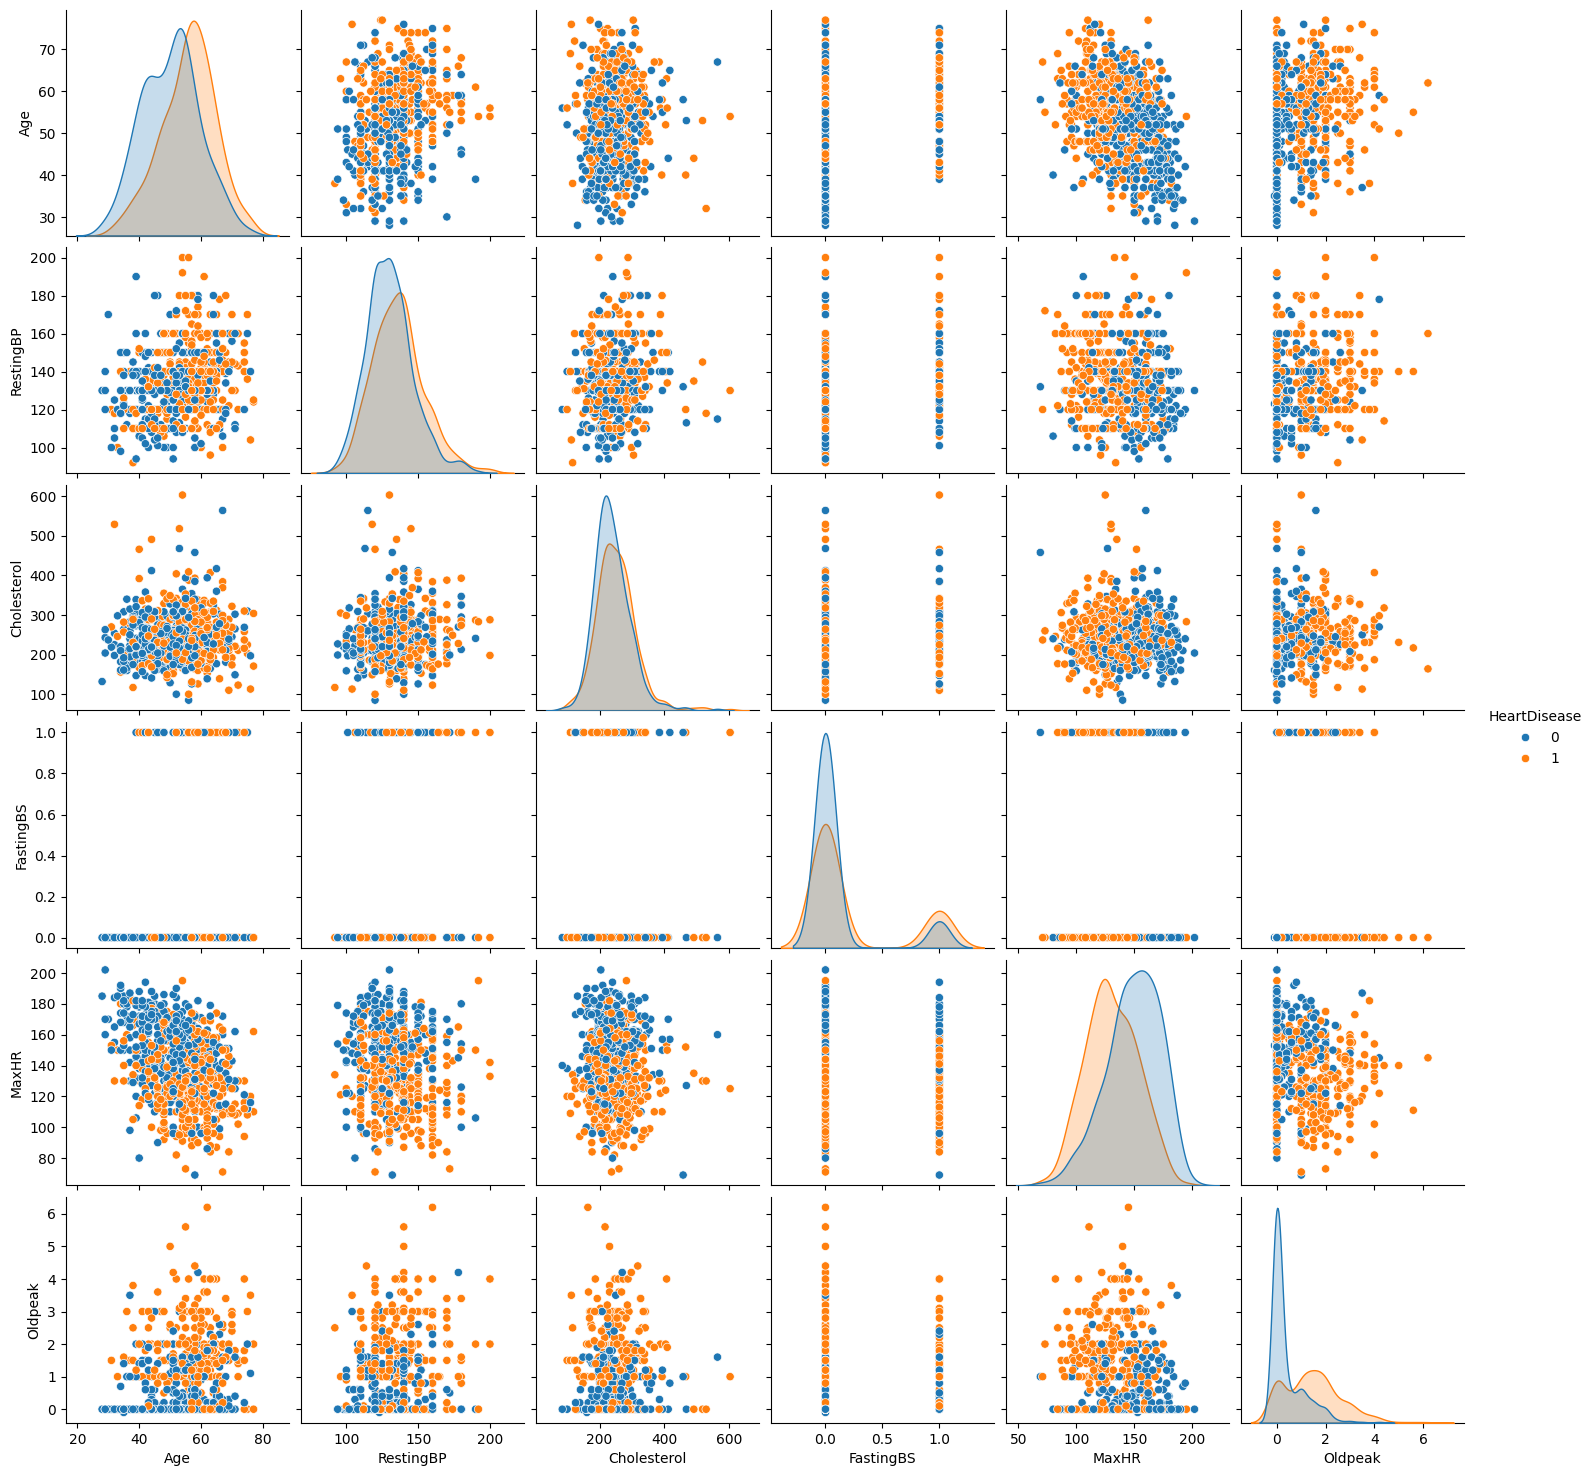

In [88]:
sns.pairplot(df, hue="HeartDisease")
plt.show()


This pairplot shows "the relationship for (n, 2) combination of variable in the DataFrame as a matrix of plots and the diagonal plots are the univariate plots."
Using this plot we can find correlations for heartdisease. for example age and maxHR shows that people with heartdisease usually have a lower max heartrate and most cases are around 60yrs old.



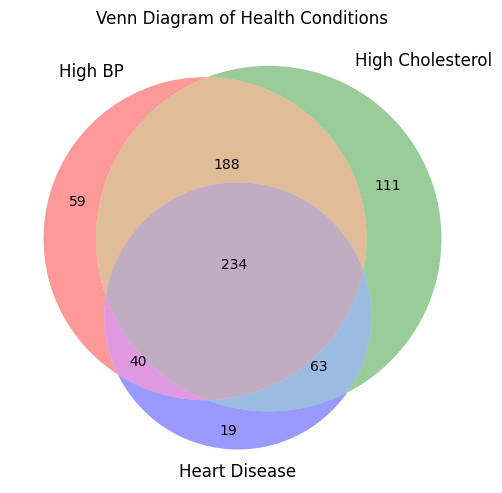

In [89]:

set1 = set(df[df['RestingBP'] > 120].index)  
set2 = set(df[df['Cholesterol'] > 200].index)
set3 = set(df[df['HeartDisease'] == 1].index)


plt.figure(figsize=(6, 6))
venn3([set1, set2, set3], ('High BP', 'High Cholesterol', 'Heart Disease'))


plt.title("Venn Diagram of Health Conditions")

plt.show()


https://my.clevelandclinic.org/health/diseases/22108-tachycardia \
According to the cleveland clinic a heartrate when resting above 100bp could give serious health problems. 
In this venn diagram people are shown that have a resting heart rate above 120 beats per minute, have a cholesterol above 200mg/dL and if they have heart disease or not. it seems that 63 people have high cholesterol and heart disease but no high heartrate. Most people with heart disease do fall in all catagories.

Some other interesting things from this plot are
- 80 patients have heart disease with normal cholesterol and a slightly high heartrate.
- 188 patients have high resting heart beat and high cholesterol yet no heart disease.

<Axes: xlabel='ChestPainType', ylabel='Count'>

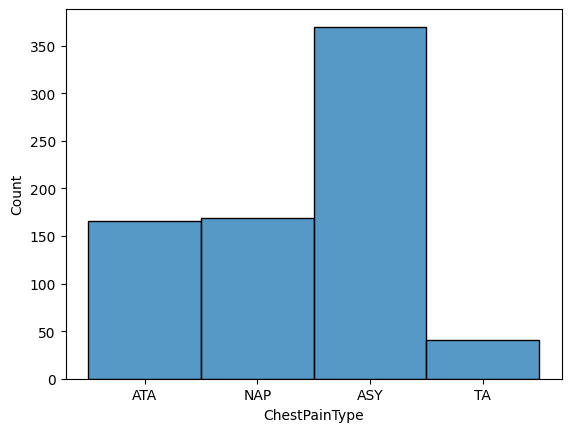

In [90]:
sns.histplot(df["ChestPainType"])

TA: Typical Angina: shortness of breath, nausea, or fatigue disproportionate to the activity level. Typical angina is often described as pressure-like, heaviness, tightness, or squeezing \
ATA: Atypical Angina: A chest pain where it is difficult to say what the specific symtpoms are. \
NAP: Non-Anginal Pain: A chest pain that is less then 5 seconds or over 30 minutes and that increases with resperation. \
ASY: Asymptomatic: Asymptomatic chest pain meaning no prior symptoms or causes \

It seems that Asymtomatic is the most common type of chest pain and Typical Angina is the least common.

Text(0.5, 1.0, 'FastingBS')

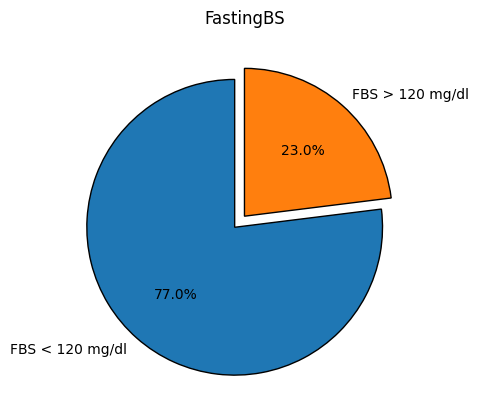

In [91]:
fbs = df[df['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS')


**Fasting blood sugar** levels below 120mg/dl show hightend chances of heartdisease.

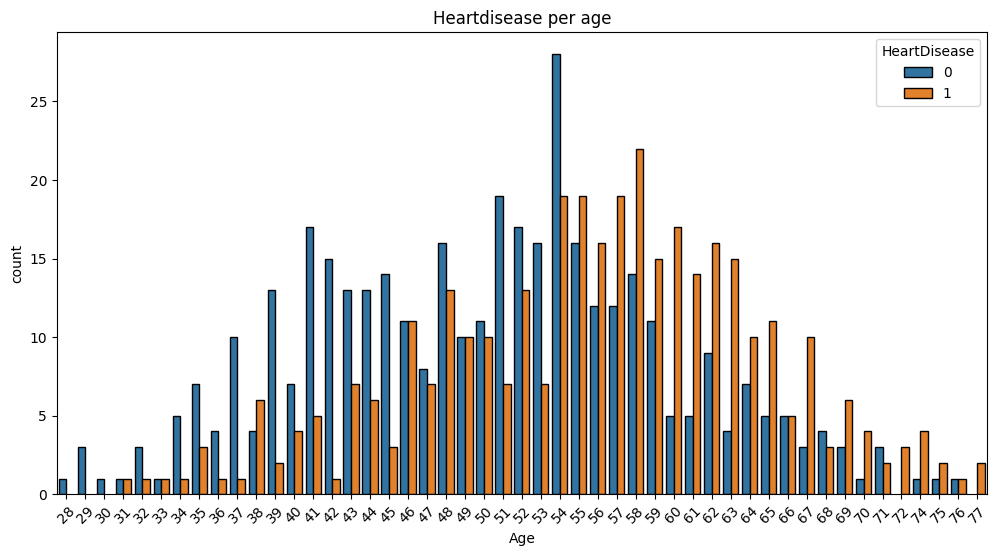

In [92]:
plt.figure(figsize=(12, 6))  
sns.countplot(x="Age", hue="HeartDisease", data=df, edgecolor='black')

plt.xticks(rotation=45)  
plt.title("Heartdisease per age")
plt.show()

it seems there is a significant peak in heart disease vs healthy patients starting at the age of 54 all the way to 70 years old. this means that age will be an important feature for the model.

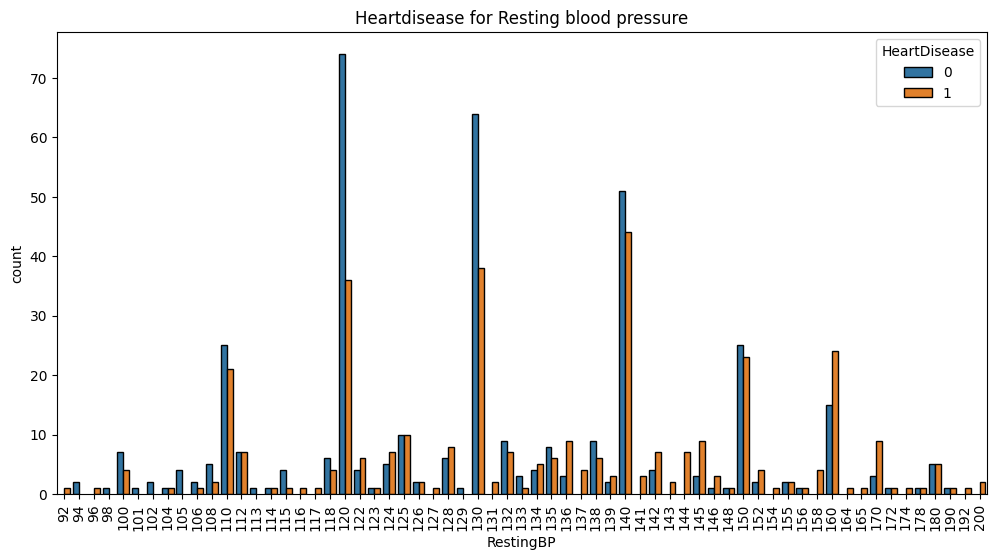

In [93]:
plt.figure(figsize=(12, 6))  
sns.countplot(x="RestingBP", hue="HeartDisease", data=df, edgecolor='black')

plt.xticks(rotation=90)  
plt.title("Heartdisease for Resting blood pressure")
plt.show()

This graph shows resting blood pressure and heartdisease. There is something interesting going on, every round number from 110 till 180 seems to have a spike in information compared to the other numbers. After 140bp it also seems that the people on this end more often have heart disease then not.

In [94]:

contingency_sex = pd.crosstab(df["Sex"], df["HeartDisease"])
chi2_sex, p_sex, dof_sex, expected_sex = stats.chi2_contingency(contingency_sex)


contingency_cp = pd.crosstab(df["ChestPainType"], df["HeartDisease"])
chi2_cp, p_cp, dof_cp, expected_cp = stats.chi2_contingency(contingency_cp)


chi2_results = {
    "Sex": {"Chi2": chi2_sex, "p-value": p_sex},
    "ChestPainType": {"Chi2": chi2_cp, "p-value": p_cp}
}

chi2_results

{'Sex': {'Chi2': np.float64(62.58908315427757),
  'p-value': np.float64(2.5466116402861134e-15)},
 'ChestPainType': {'Chi2': np.float64(215.19039576001535),
  'p-value': np.float64(2.199657628673997e-46)}}

Here there are 2 values for each feature compared to Heartdisease.
We have the Chi2 value, this shows if there is a strong relationship between the variables a high value means strong relation
We have the p-value, this shows if these relations are statisticly significant.

For Sex & Heartdisease we get a chi2 value of about 84.14, and a p value of 4.597617450809164e-20. This high chi value means there is a strong relation between sex and heartdisease and the extremely low p value tells us it is also very significant so this should we put in our model.


For Chestpaintype & Heartdisease we get a chi2 value of about 268.07, and a p value of 8.08372842808765e-58. This very high chi value means there is a very strong relation between sex and heartdisease and the extremely low p value tells us it is also very significant so this should we also be put in our model.

In [95]:
df["HeartDisease"].value_counts(normalize=True)


HeartDisease
0    0.522788
1    0.477212
Name: proportion, dtype: float64

There is a good distribution between patients with heartdisease and people who don't have heart disease.

## Machinelearning - Training the models


#### Importing used modles and pre processing data


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [108]:

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
numerical_cols = ["Age", "RestingBP", "Cholesterol"]


preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


The data needs to be preprocessed before it can be used, This is because the machinelearning algoritms can't just read these numbers they need to be in a clean and consistent matter. So by preproccesing the data its more machinelearning friendly. 

**StandardScaler** Makes the scale of all numerical catagories the same. 

**OneHotEncoder** Turn's catagories into 0 and 1's to make it machine readable. 

#### Training the models


In [109]:


model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[66 12]
 [ 8 64]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        78
           1       0.84      0.89      0.86        72

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



Here we can see the outcome of the RandomForestClassifier, It has a high precision, a good True positve and True negative ratio compared to the False postive and Fasle negative. The model is slightly better at finding people that do have heartdisease then people that don't and the model is quite balanced.

In [110]:
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(probability=True))  
])


svm_params = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf"],
    "classifier__gamma": ["scale", "auto"]
}


svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring="accuracy")
svm_grid.fit(X_train, y_train)


y_pred_svm = svm_grid.predict(X_test)
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Confusion Matrix:
[[66 12]
 [ 8 64]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        78
           1       0.84      0.89      0.86        72

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



Comparing SVM to RandomForest it shows that it has slighty more errors, slightly lower accuracy but is good at detecting the disease. Still random forrest is preffered in this case.

In [111]:

logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))



Logistic Regression Confusion Matrix:
[[65 13]
 [10 62]]
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        78
           1       0.83      0.86      0.84        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



Logistic Regression is interpretable and still strong and could serve as a great baseline model. yet it still doesnt beat our random forrest.

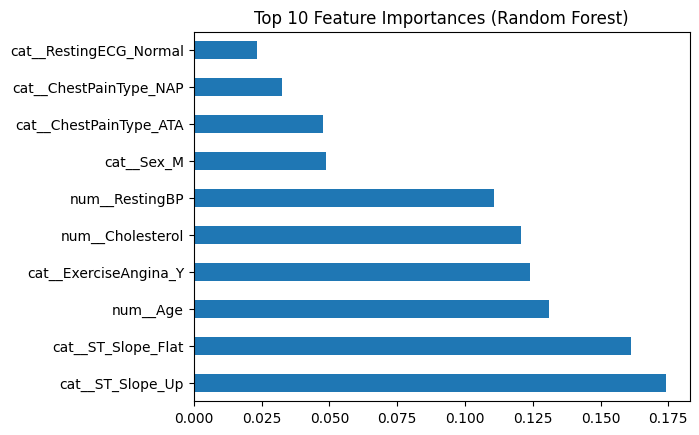

In [112]:

feature_names = model.named_steps["preprocessor"].get_feature_names_out()
importances = model.named_steps["classifier"].feature_importances_



feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


Here a plot is made to show what features are important according to the Random Forest model (our best model).
It shows that Age, Cholesterol, ST segments after excersise and ExerciseAngina have most influence when trying to predict heartdisease. 
These Risk factors agree with our current medicial knowledge about Heartdisease. For better optimilisation we could try different weights for different features. for example giving Resting ECG less weight and Cholesterol more to make the model beter.



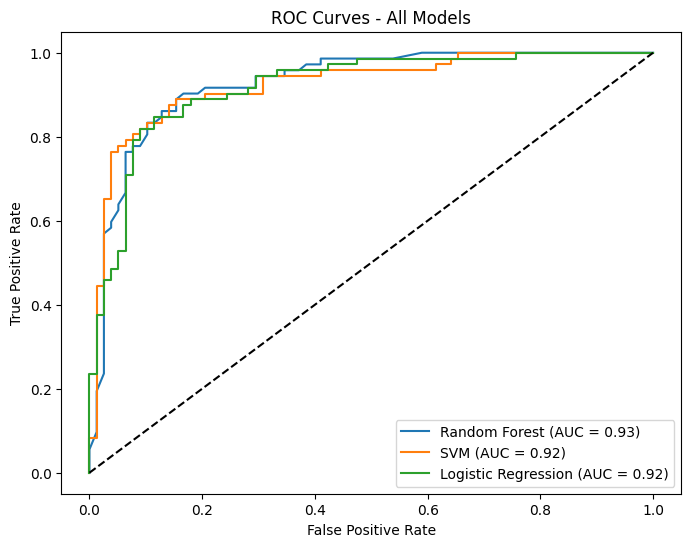

In [113]:
plt.figure(figsize=(8,6))
plot_roc(model, X_test, y_test, "Random Forest")
plot_roc(svm_grid, X_test, y_test, "SVM")
plot_roc(logreg_pipeline, X_test, y_test, "Logistic Regression")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Models")
plt.legend()
plt.show()


The AUC will tell us if the model is worse tehn random guessing this is when the line is underneath the black dotted line. 

This is not the case for any of the models used, meaning that they are way better then randoly guessing.

In [114]:
models = {
    "Random Forest": model,
    "SVM": svm_grid.best_estimator_,
    "Logistic Regression": logreg_pipeline,
}

for name, pipeline in models.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring="roc_auc")
    print(f"{name}: Mean AUC = {scores.mean():.3f} ± {scores.std():.3f}")


Random Forest: Mean AUC = 0.900 ± 0.059
SVM: Mean AUC = 0.908 ± 0.055
Logistic Regression: Mean AUC = 0.918 ± 0.046


This confirms the earlier thoughts of our models being better then randomly guessing. The mean check is a more strict AUC.

### Conclusion

**Research question**
Can a model predict based on symptoms if a patient has heartdisease?

Yes based on known symptoms that cause heartdisease, like cholesterol and ECG results a model like RandomForrest can quite nicely predict if a patient has heartdisease or not. If used in practice allot more fine tuning could be done to the feature weight so the accuracy will become higher!